# Who will survive in Titanic?

When the Titanic sank, 1502 of the 2224 passengers and crew were killed. One of the main reasons for this high level of casualties was the lack of lifeboats on this self-proclaimed "unsinkable" ship. Those who have seen the movie know that some individuals were more likely to survive the sinking than others. In this work we will study the passengers data and apply machine learning techniques to predict a passenger's chance of surviving.

##  Explore the Data 

By exploring the dataset, we've found out that among all the passengers, the **cabinet class, sex and age** are effecting the survival rate. 



In order to explore which parameters contribute to the survival, let's first have a look at the data we got.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv("train.csv")
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above is a summary of the data from the Titanic. The dataset includes 891 passengers, recorded with their survival information and other features like Sex and age. 

In [5]:
test = pd.read_csv("test.csv")
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train['Pclass'].unique()

array([3, 1, 2])

In [7]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [8]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [9]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

##   Pclass : Do higher class passengers have higher survival rate? 
Cabinet class is first studied. A plot is shown for each class to visualize the survival data. 

In [10]:
def cross_plt(feat):
    pay_xt = pd.crosstab(train[feat], train['Survived'])
    pay_xt.plot(kind='bar', 
                   stacked=True, 
                   title= feat + 'v.s. Survived', color = ['gray', 'green'], alpha = 0.65)
    return pay_xt

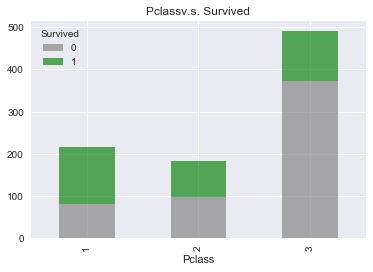

In [11]:
pclass = cross_plt('Pclass')

In [12]:
pclass.loc[1,:]

Survived
0     80
1    136
Name: 1, dtype: int64

In [13]:
pclass.sum(1)

Pclass
1    216
2    184
3    491
dtype: int64

In [14]:
pclass[1]/pclass.sum(1)

Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64

**Pclass contributes to the survival rate.**

Among the three different classes, Pclass 1 has the highest survival rate of 63.0%, Pclass 2 has higher rate than Pclass 3. In this case we can conclude that Pclass is an important parameter.

## Sex: Do Ladies have higher survival rate?  ##

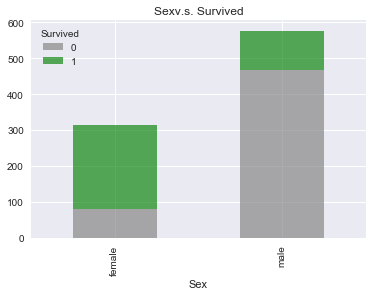

In [15]:
sex = cross_plt('Sex')

In [16]:
sex

Survived,0,1
Sex,,
female,81,233
male,468,109


In [17]:
print ("Survival rate v.s. Sex")
print (sex[1]/sex.sum(1))

Survival rate v.s. Sex
Sex
female    0.742038
male      0.188908
dtype: float64


According to the survival rate simply grouped by **Sex**, female has much higher survival rate (74.2%) than Male(18.9%). 

##  Age: Do elder people have higher survival rate or lower?  ##

In [18]:
print ("There are {} empty value for Age group.".format(train["Age"].isnull().sum()))
print ("Total population is: ", len(train))

There are 177 empty value for Age group.
Total population is:  891


In [19]:
def age_range(age):
    if age <18:
        return "Child"
    elif age < 35:
        return "Youth"
    elif age < 60:
        return "Adult"
    else:
        return "Elder"

train["Age_group"] = train["Age"].apply(age_range)

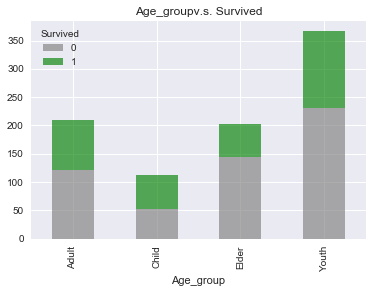

In [20]:
age_g = cross_plt('Age_group')

In [21]:
age_g

Survived,0,1
Age_group,,
Adult,122,87
Child,52,61
Elder,144,59
Youth,231,135


In [22]:
print ("Survival rate v.s. Age")
print (age_g[1]/age_g.sum(1))

Survival rate v.s. Age
Age_group
Adult    0.416268
Child    0.539823
Elder    0.290640
Youth    0.368852
dtype: float64


According to the survival rate simply grouped by **Age**, though the elder are lower than the others, but even NaN group has average survival rate. It's hard to get any conclusion from this chart simply by grouping them into Age groups. 

## Feature selection
- Feature "Cabin" has only 204 records, the huge amount of missing value will not bring any information for the analysis, so this feature shall be dropped.
- Feauture "Name" as a string will not help with the analysis, while the PassengerID will be more unique for the identity of the passenger, thus it shall be dropped as well.
- The tickets value are very confusing, this information will not bring value to the analysis either, so it shall be removed as well.
- There are 177 missing values for the Age, so the missing values will be replaced with average age.


In [23]:
df = pd.concat([train,test])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1046 non-null float64
Age_group      891 non-null object
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [25]:
df = df.drop(['Ticket','Cabin','Name' ], axis=1)

In [26]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [27]:
df['Embarked'].isnull().sum()

2

There are only 2 missing values of "Embarked" feature, which will also be filled in the most common value "S"

In [28]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [29]:
df['Embarked'] = df['Embarked'].fillna('S')

There are only 1 missing values of "Fare" feature, which will also be filled in the mean value of the fare.

In [30]:
df['Fare'].isnull().sum()

1

In [31]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

Though there are sibling, parents and children information, which will contributes to a new feature called "Family size", which includes the family size information.

In [32]:
df['family_size'] = df['SibSp'] + df['Parch']+1

In [33]:
df.head()

,Age,Age_group,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,family_size
0,22.0,Youth,S,7.2500,0,1,3,male,1,0.0,2
1,38.0,Adult,C,71.2833,0,2,1,female,1,1.0,2
2,26.0,Youth,S,7.9250,0,3,3,female,0,1.0,1
3,35.0,Adult,S,53.1000,0,4,1,female,1,1.0,2
4,35.0,Adult,S,8.0500,0,5,3,male,0,0.0,1


In [34]:
df['Embarked'] = pd.Categorical(df['Embarked']).codes

In [35]:
df['Sex'] = pd.Categorical(df['Sex']).codes

In [36]:
df_train = df.iloc[:train.shape[0], :]
df_test = df.iloc[train.shape[0]:, :]
df_test = df_test.drop('Survived',1)

In [37]:
labels = df_train["Survived"]
features = df_train.drop('Survived',1)

In [38]:
feats = [feat for feat in features]

## Cross-validation

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

## Creating Decision Tree

In [81]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [122]:
parameters = {'min_samples_split':[3, 5, 7, 10],
               "min_impurity_split":[6e-07,5e-07,7e-07],
                "min_samples_leaf":[1,3, 5] , "random_state": [46]
             }

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=parameters, cv=cv)
grid.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [3, 5, 7, 10], 'min_impurity_split': [6e-07, 5e-07, 7e-07], 'random_state': [46], 'min_samples_leaf': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [123]:
print("The best parameters are %s with a score of %0.3f"
      % (grid.best_params_, grid.best_score_))

estimator = grid.best_estimator_
pred = estimator.predict(features_test)
count = 0
for i in pred - labels_test:
    if i == 0: count += 1
print count
print count/float(len(pred-labels_test))

The best parameters are {'min_samples_split': 3, 'min_impurity_split': 6e-07, 'random_state': 46, 'min_samples_leaf': 3} with a score of 0.781
166
0.927374301676


In [124]:
print "The top features with highest scores for the classifier "
for i, j  in enumerate(estimator.feature_importances_):
    if j >0.05:print i,j , feats[i]

The top features with highest scores for the classifier 
0 0.162383770866 Age
2 0.195050780648 Fare
4 0.135945985293 Pclass
5 0.400391000966 Sex
7 0.0912385193557 family_size


In [125]:
pred_tree = estimator.predict(df_test).astype(int)

In [126]:
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(pred_tree, PassengerId, columns = ["Survived"])

In [127]:
my_solution.to_csv("my_solution_tree.csv", index_label = ["PassengerId"])

The tree got a score of 0.760

## Random Forest 
 
Random Forest technique handles the overfitting problem you faced with decision trees. It grows multiple (very deep) classification trees using the training set. At the time of prediction, each tree is used to come up with a prediction and every outcome is counted as a vote. For example, if you have trained 3 trees with 2 saying a passenger in the test set will survive and 1 says he will not, the passenger will be classified as a survivor. 

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
parameters = {'n_estimators':[10, 20, 50],
               "min_impurity_split":[6e-07,5e-07,7e-07],
                "min_samples_split":[2,4, 6] , "random_state": [46]
             }

#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(RandomForestClassifier(), param_grid=parameters)
grid.fit(features, labels)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 50], 'min_impurity_split': [6e-07, 5e-07, 7e-07], 'min_samples_split': [2, 4, 6], 'random_state': [46]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [132]:
print("The best parameters are %s with a score of %0.3f"
      % (grid.best_params_, grid.best_score_))

estimator = grid.best_estimator_

The best parameters are {'min_samples_split': 6, 'min_impurity_split': 6e-07, 'random_state': 46, 'n_estimators': 20} with a score of 0.818


In [133]:
estimator.feature_importances_

array([ 0.21275508,  0.02998183,  0.2206941 ,  0.02633842,  0.09675697,
        0.32495877,  0.03440964,  0.0541052 ])

In [134]:
print "The top features with highest scores for the classifier "
for i, j  in enumerate(estimator.feature_importances_):
    if j >0.05:print i,j , feats[i]

The top features with highest scores for the classifier 
0 0.21275507804 Age
2 0.220694096189 Fare
4 0.096756967411 Pclass
5 0.324958770916 Sex
7 0.0541051990787 family_size


In [135]:
pred_forest = estimator.predict(df_test).astype(int)
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(pred_forest, PassengerId, columns = ["Survived"])
my_solution.to_csv("my_solution_forest.csv", index_label = ["PassengerId"])

## Conclusion ##
This chart shows the combination of "Pclass", "Sex" and "Age". 
1. Pclass has effect on the survival rate. 
    It is clearly shown that Pclass 3 has much lower survival rate, while the difference between Pclass 1 and 2 are not clear. 
2. Age and Sex both has effect on the survival rate. 
    Female has higher survival rate than male, and Female Elder has the highest among all. Male Adult and Elder has very low rate. However, Male Youth has high survival rate in Pclass 1 and 2 (both 100%), while 33% at Pclass 3. 
3. So far it is clear that there's correlation between Pclass, Sex and Age, but it's not causation relationship. Some Machine Learning calculation is required to oder to find out which parameter contributes more.  
